# Step 1: Understanding Data

##Let’s start with the following steps:

     . Importing data using the pandas library

     . Understanding the structure of the data



In [1]:
from google.colab import drive

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records

advertising_Sales = pd.read_csv("/content/advertising.csv")
advertising_Sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
advertising_Sales.shape

(200, 4)

In [4]:
advertising_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* we can see the dataset has four columns out of which 3 columns i.e., TV, Radio, and Newspaper are independent variables with float64 datatype and one column Sales is the predictor variable with a numerical value. the dataset has a total of 200 records.

In [8]:
# Transposition of descriptive statistics
advertising_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [11]:
# We check for missing values
advertising_Sales.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [12]:
# Correlation map between variables

advertising_Sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


##Step 2: Visualising the Data

Let’s now visualize our data using seaborn. We’ll first make a pair plot of all the variables present to visualize which variables are most correlated to Sales.

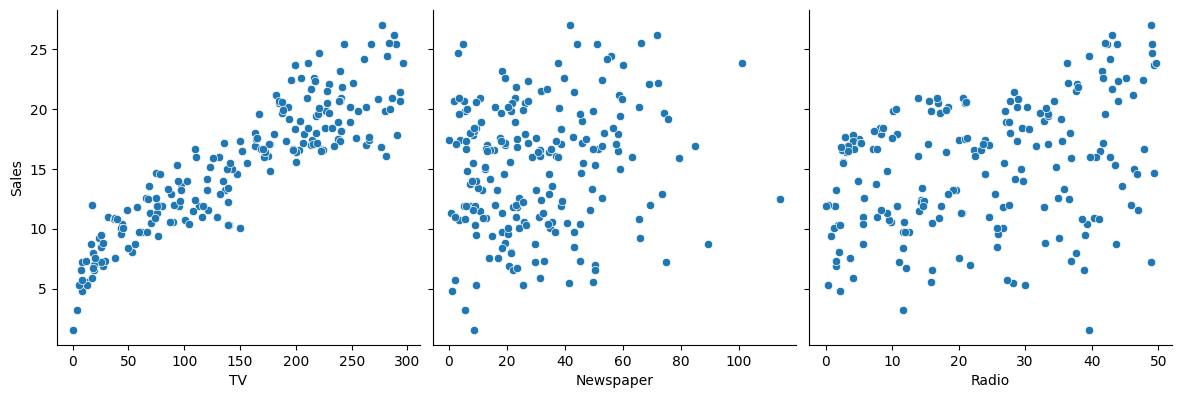

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(advertising_Sales, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

we will plot a heatmap to visualize the multicollinearity in the dataset.


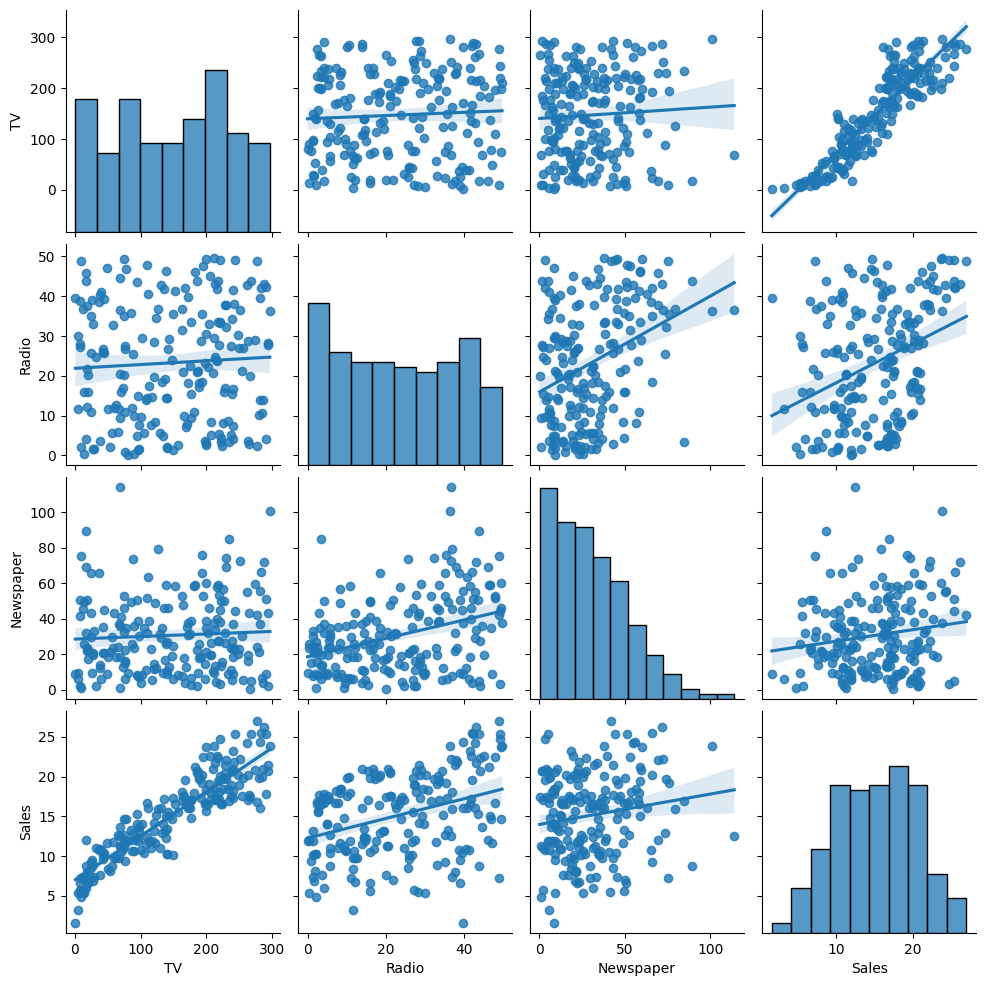

In [14]:
sns.pairplot(advertising_Sales,kind='reg');

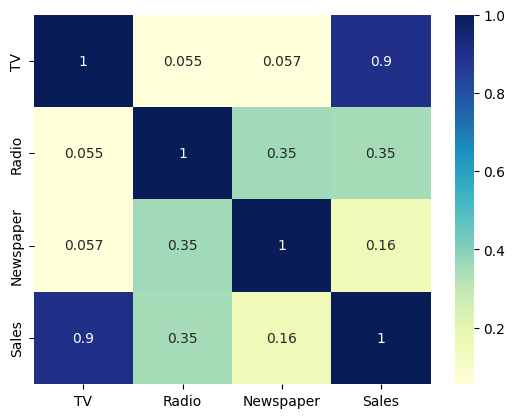

In [6]:
sns.heatmap(advertising_Sales.corr(), cmap="YlGnBu", annot = True)
plt.show()

we can observe from the pair plot and the heatmap, the variable TV seems to be most correlated with Sales.

So let’s go ahead and perform simple linear regression using TV as our feature variable.

# Step 3: Performing Simple Linear Regression

Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+…+𝑚𝑛𝑥𝑛

    𝑦 is the response
    𝑐 is the intercept
    𝑚1 is the coefficient for the first feature
    𝑚𝑛 is the coefficient for the nth feature

In our case:

𝑦=𝑐+𝑚1×𝑇𝑉

The 𝑚 values are called the model coefficients or model parameters.
Generic Steps in the model building using statsmodels

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.


# Generic Steps in the model building using statsmodels

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [16]:
X = advertising_Sales['TV']
y = advertising_Sales['Sales']

# Train-Test Split

We now need to split our variables into training and testing sets. We’ll perform this by importing train_test_split from the sklearn.model_selection library.

It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Building a Linear Model

You first need to import the statsmodel.api library using which you’ll perform the linear regression.

By default, the statsmodels library fits a line on the dataset which passes through the origin.

But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels.

And once you’ve added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below.


In [19]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [20]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        09:42:52   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

Looking at some key statistics from the summary

The values we are concerned with are –

     .The coefficients and significance (p-values)
     .R-squared
     .F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.
2. R – squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.
3. F statistic has a very low p-value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance.

The fit is significant. Let’s visualize how well the model fits the data.

From the parameters that we get, our linear regression equation becomes:

               𝑆𝑎𝑙𝑒𝑠=6.948+0.054×𝑇𝑉


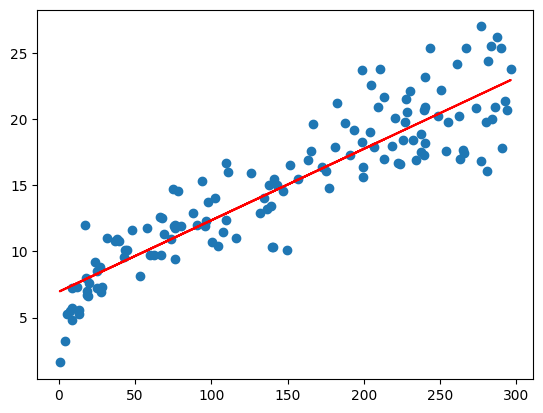

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Step 4: Residual analysis

To validate assumptions of the model, and hence the reliability for inference
Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

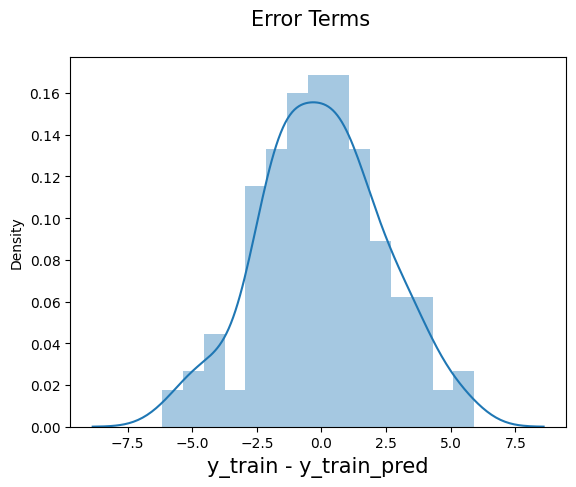

In [23]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

# Looking for patterns in the residuals

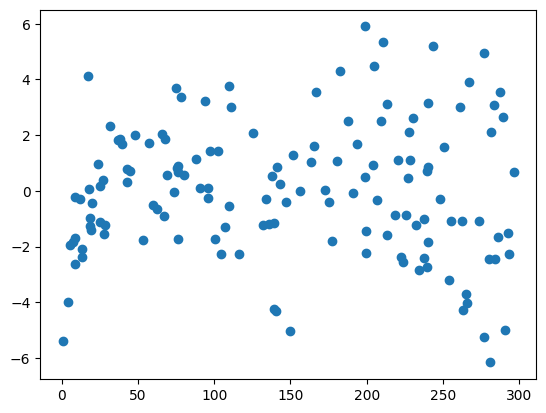

In [24]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn’t by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

# Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it’s time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.


In [25]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Looking for RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [26]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

Visualizing the fit on the test set

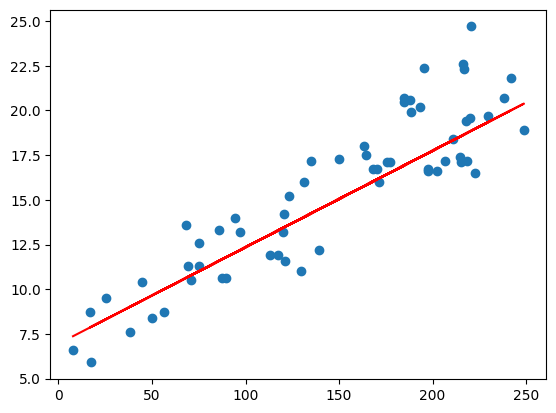

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

Conclusion

we have demonstrated in detail how to apply linear regression using stats model for predicting sales from advertising data. By carefully selecting the right variables, preparing and cleaning the data, and selecting an appropriate regression model, businesses can accurately predict sales from advertising ads.

Our analysis resulted in a good R-squared value of 0.7921, which indicates that the linear regression model has a decent fit for the data. This level of accuracy can provide businesses with valuable insights into the effectiveness of their advertising campaigns and enable them to make informed decisions about how to allocate their resources.

 it’s important to consider the limitations of linear regression, including the assumption of linearity and the potential impact of outliers. By following best practices and analyzing the data accurately, businesses can maximize the effectiveness of their advertising campaigns and achieve a higher return on investment.
